In [30]:
import math
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [31]:
data_original = pd.read_csv("T:\\projects_with_radhika_mam\\stock_market_prediction\\dataset\\index_data\\NIFTY 50_Data.csv")
data = data_original.copy()
data.head()

,Date,Open,High,Low,Close
0,09 Sep 2022,17923.35,17925.95,17786.00,17833.35
1,08 Sep 2022,17748.15,17807.65,17691.95,17798.75
2,07 Sep 2022,17519.40,17650.75,17484.30,17624.40
3,06 Sep 2022,17695.70,17764.65,17587.65,17655.60
4,05 Sep 2022,17546.45,17683.15,17540.35,17665.80


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5645 non-null   object 
 1   Open    5645 non-null   float64
 2   High    5645 non-null   float64
 3   Low     5645 non-null   float64
 4   Close   5645 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.6+ KB


In [33]:
data["Date"] = pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5645 entries, 0 to 5644
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5645 non-null   datetime64[ns]
 1   Open    5645 non-null   float64       
 2   High    5645 non-null   float64       
 3   Low     5645 non-null   float64       
 4   Close   5645 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.6 KB


In [57]:
data.head()

,Date,Open,High,Low,Close
5644,2000-01-03,1482.15,1592.90,1482.15,1592.2
5643,2000-01-04,1594.40,1641.95,1594.40,1638.7
5642,2000-01-05,1634.55,1635.50,1555.05,1595.8
5641,2000-01-06,1595.80,1639.00,1595.80,1617.6
5640,2000-01-07,1616.60,1628.25,1597.20,1613.3


In [58]:
data.shape

(5645, 5)

In [62]:
data.sort_index(ascending=False, inplace=True)
data.head()
data.index = [x for x in range(0,5645)]
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644],
           dtype='int64', length=5645)

Text(0, 0.5, 'Closing Price in INR')

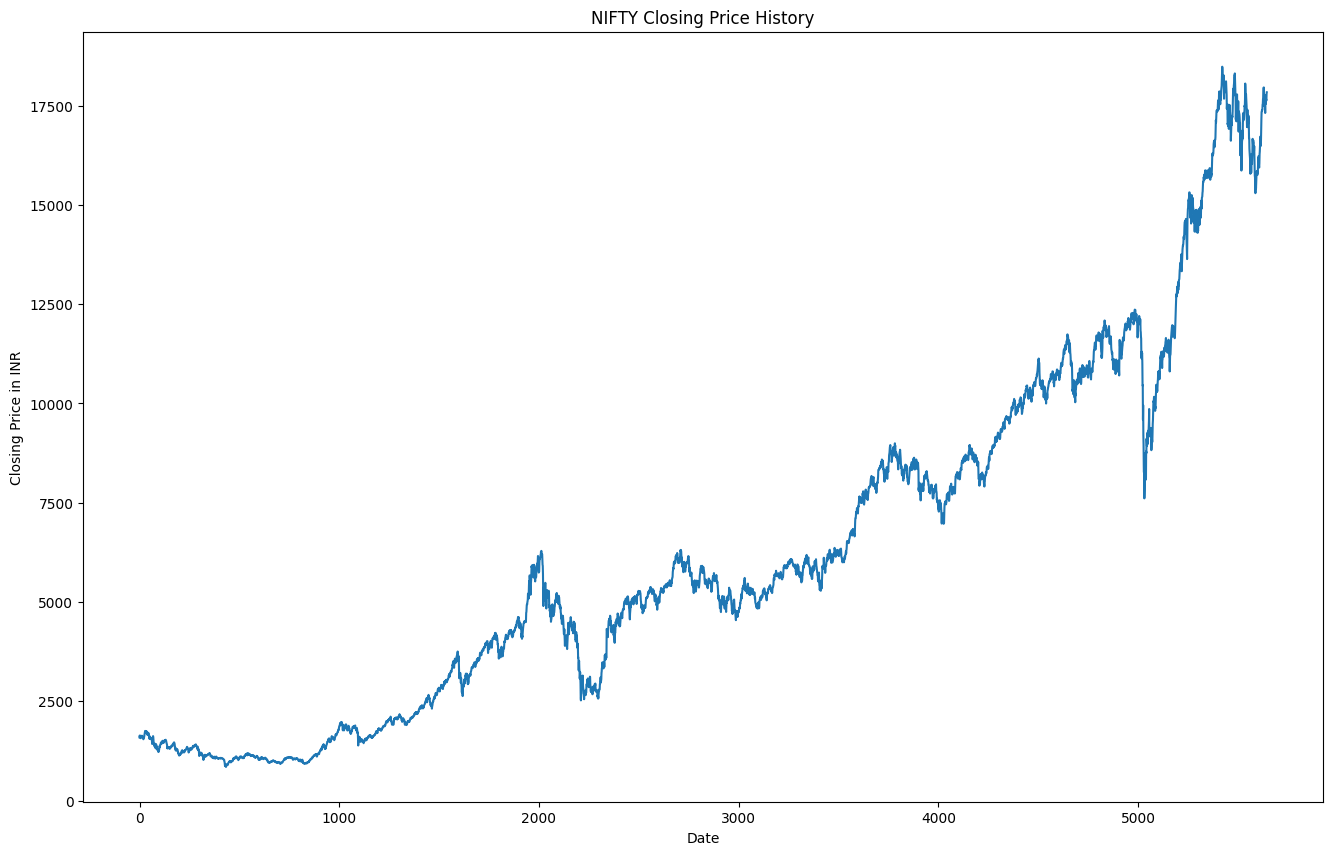

In [64]:
plt.figure(figsize=(16,10))
plt.title("NIFTY Closing Price History")
plt.plot(data["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price in INR")

In [88]:
closing = data["Close"]
closing = np.array(closing)
closing = closing.reshape((-1,1))
closing = pd.DataFrame(closing)
training_length = math.ceil(len(closing) * 0.8)
training_length

4516

In [68]:
#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_closing = scaler.fit_transform(closing)
scaled_closing

array([[0.04187745],
       [0.04451607],
       [0.04208173],
       ...,
       [0.95161679],
       [0.9615102 ],
       [0.96347356]])

In [69]:
# create training dataset 
# create the scaled training dataset

train_data = scaled_closing[0:training_length,:]
train_data = np.array(train_data)
train_data.shape

(4516, 1)

In [80]:
x_train, y_train = [],[]
for i in range(100,len(train_data)):
    x_train.append(train_data[i-100,0])
    y_train.append(train_data[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
print(x_train.shape)
print(y_train.shape)

(4416, 1)
(4416, 1)


In [82]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (train_data.shape[0],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [83]:
# model.fit(x_train, y_train, batch_size= 1, epochs=1)


4416/4416 [==============================] - 29s 5ms/step - loss: 0.0022


In [84]:
# model.save("model_1.h5")

In [90]:
test_data = scaled_closing[training_length-100:,:]
x_test = []
y_test = train_data[training_length:,:]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100,0])

In [91]:
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0],1)
x_test.shape

(1129, 1)

In [92]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

36/36 [==============================] - 2s 3ms/step


C:\Users\mmtan\AppData\Local\Temp\ipykernel_4660\2279270176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = prediction


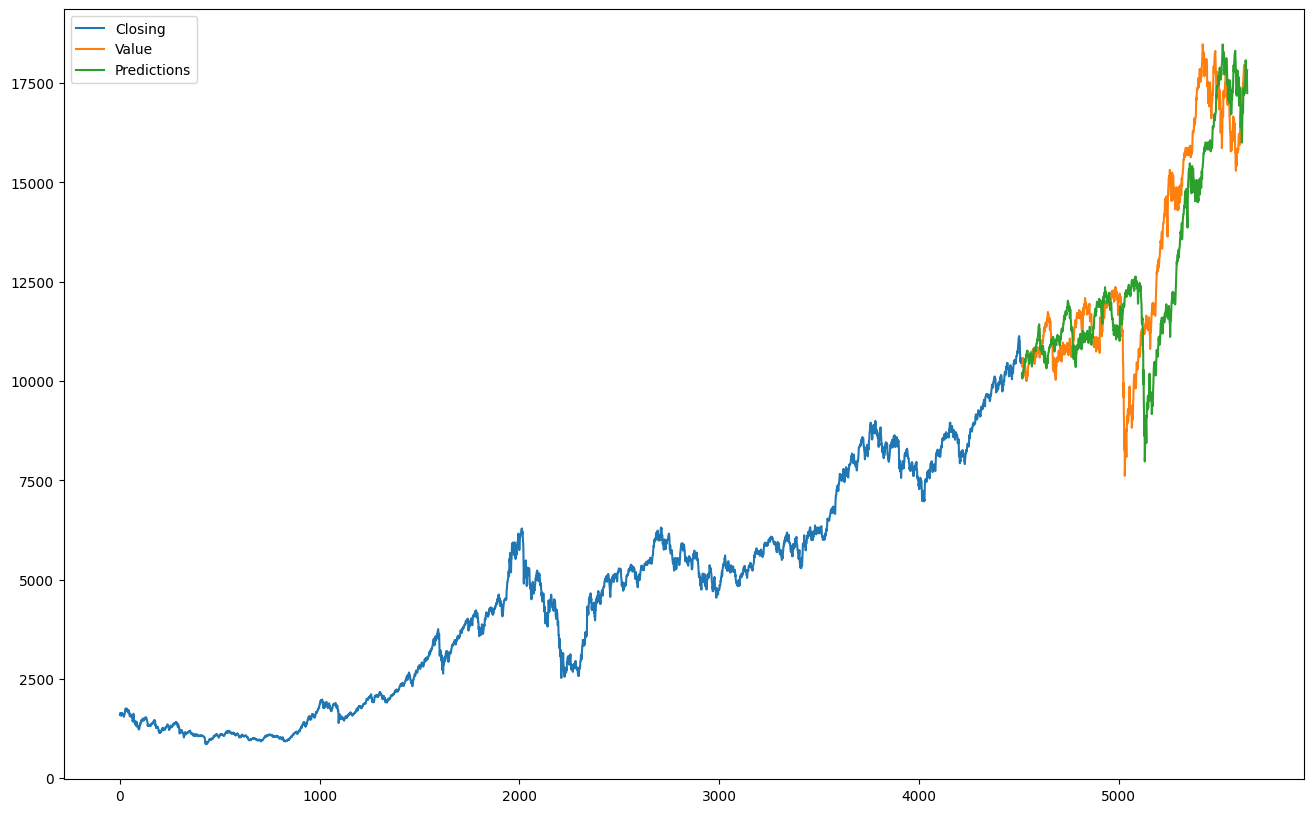

In [103]:
train = closing[:training_length]
valid = closing[training_length:]
valid["Prediction"] = prediction
plt.figure(figsize=(16,10))
plt.plot(train)
plt.plot(valid[[0, "Prediction"]])
plt.legend(["Closing","Value","Predictions"])
plt.show()